In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data2.txt', names=['area (ft^2)', 'bedrooms', 'price'])
data.head()

,area (ft^2),bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
X = data[['area (ft^2)', 'bedrooms']]  # features của chúng ta gồm area và bedrooms
X = X.to_numpy()

y = data.price
y = y.to_numpy().reshape(-1, 1)

In [4]:
# Chúng ta cũng cần phải rescale lại X để việc tìm theta đc dễ dàng hơn

def rescale(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_rescaled = (X - mu) / sigma
    return X_rescaled, mu, sigma

X_rescaled, mu, sigma = rescale(X)

In [5]:
# Chúng ta cần thêm 1 features X0 (bias) vào X

one = np.ones((X_rescaled.shape[0], 1))  # vector có độ dài bằng số hàng của X
X = np.concatenate((one, X_rescaled), axis=1)

In [6]:
# Matrix X của chúng ta có dạng như sau

X[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [7]:
# Đầu tiên ta vẫn cần một hàm Loss

def loss(X, theta):
    m = X.shape[0]
    y_pred = np.dot(X, theta)
    J = (1/m) * (1/2) * np.dot((y_pred - y).T, (y_pred - y))
    return J

In [8]:
# Việc tìm đường thẳng gần với điểm dữ liệu nhất,
# chính là tìm theta sao cho J nhỏ nhất

def grad(X, y, theta, iters, learning_rate):
    J_history = []
    m = X.shape[0]
    for _ in range(iters):
        y_pred = np.dot(X, theta)
        theta -= (1/m) * learning_rate * np.dot(X.T, y_pred - y)
        J = loss(X, theta)
        J_history.append(J[0][0])
    return theta, J_history

In [9]:
# Khởi tạo theta ngẫu nhiên
theta = np.random.rand(3, 1)

iters = 400
learning_rate = 0.001
theta, J_history = grad(X, y, theta, iters, learning_rate)

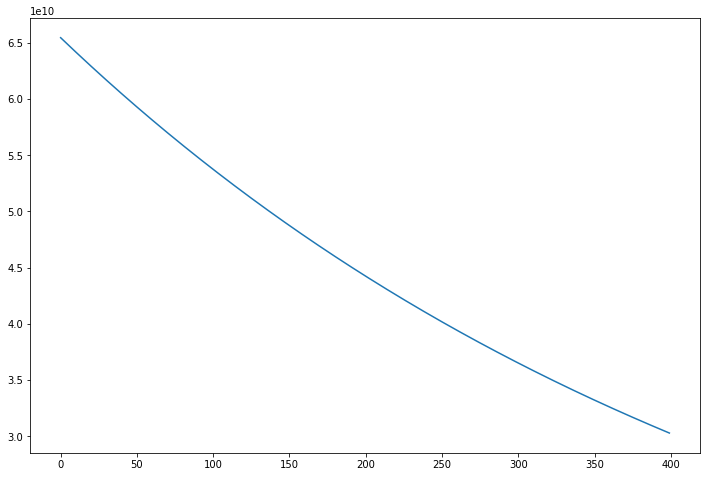

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(range(iters), J_history)
plt.show()

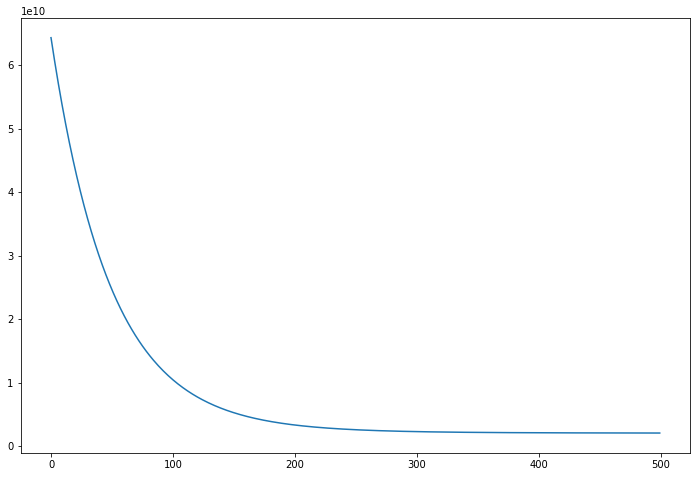

In [11]:
# Có lẽ learning_rate hơi nhỏ, ta sẽ tăng lên

theta = np.random.rand(3, 1)

iters = 500
learning_rate = 0.01
theta, J_history = grad(X, y, theta, iters, learning_rate)

plt.figure(figsize=(12, 8))
plt.plot(range(iters), J_history)
plt.show()

In [12]:
print(theta)

[[ 3.38175985e+05]
 [ 1.03032132e+05]
 [-2.02332832e+02]]


In [13]:
# Dự đoán căn nhà có diện tích 1650 sq-ft, 3 phòng ngủ

X_test = np.array([[1650, 3]])

# Normalize X_test theo mu và sigma của X bên trên
X_test = (X_test - mu) / sigma

one = np.ones((1, 1))
X_test = np.concatenate((one, X_test), axis=1)

X_test

array([[ 1.        , -0.44604386, -0.22609337]])

In [14]:
# Dự đoán

y_pred = np.dot(X_test, theta)
print(y_pred)

[[292264.88114148]]


Vậy model của chúng ta dự đoán căn nhà có diện tích 1650 sq-ft với 3 phòng ngủ là $292,264.88983631

<hr>

# Tính bằng Normal Equation

In [15]:
# Load dữ liệu training

X = data[['area (ft^2)', 'bedrooms']]
X = X.to_numpy()

y = data.price
y = y.to_numpy().reshape(-1, 1)

In [16]:
# Ta vẫn cần thêm bias vào training data

one = np.ones((X.shape[0], 1))
X_bar = np.concatenate((one, X), axis=1)

In [17]:
# Đây là dữ liệu ta sẽ dùng để train.
# Với Normal Equation ta không cần phải Normalize dữ liệu

X_bar[:5]

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00]])

In [18]:
a = np.dot(X_bar.T, X_bar)
b = np.dot(X_bar.T, y)
theta = np.dot(np.linalg.pinv(a), b)

In [19]:
theta

array([[89597.90954355],
       [  139.21067402],
       [-8738.01911255]])

In [20]:
# Dự đoán căn nhà có diện tích 1650 sq-ft, 3 phòng ngủ

X_test = np.array([[1650, 3]])

one = np.ones((1, 1))
X_test = np.concatenate((one, X_test), axis=1)

y_pred = np.dot(X_test, theta)
print(y_pred)

[[293081.46433497]]


In [21]:
# Hai cách dự đoán cho ra kết quả lệch nhau

print((293081.46433497 - 292264.88983631) / 293081.46433497 * 100, '%')

0.2786169028167221 %


<hr>

# Dùng Linear Regression trong thư viện scikit-learn

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = data[['area (ft^2)', 'bedrooms']]
y = data.price

In [23]:
scaler = StandardScaler()
X_rescale = scaler.fit_transform(X)

In [24]:
X_rescale

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [25]:
linear_reg = LinearRegression()
linear_reg.fit(X_rescale, y)

LinearRegression()

In [26]:
print(linear_reg.intercept_)
print(linear_reg.coef_)

340412.6595744681
[109447.79646964  -6578.35485416]


In [27]:
# Dự đoán căn nhà có diện tích 1650 sq-ft, 3 phòng ngủ

X_test = np.array([[1650, 3]])
X_test_rescale = scaler.transform(X_test)

In [28]:
print(linear_reg.predict(X_test_rescale)[0])

293081.4643348962


Vậy Normal Equation và Linear Regression trong thư viện scikit-learn cho ra kết quả như nhau, có nghĩa rằng Gradient Descent cần phải tăng thêm iters để kết quả được chính xác hơn.